# 필요한 모듈 설정

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import patches
%matplotlib inline

# 데이터 로드

In [2]:
wine = pd.read_csv('WineQT_add.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 데이터 크기, 결측치 확인

In [3]:
wine.shape

(2742, 12)

In [4]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Modeling 

## Scaled, Normalization

In [5]:
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE 

oversample = SMOTE()
features, labels =  oversample.fit_resample(wine.drop(["quality"],axis=1), wine["quality"])
scaler = preprocessing.MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
scaled_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.000000,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.000000,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.040000,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.560000,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.000000,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
...,...,...,...,...,...,...,...,...,...,...,...
6979,0.353982,0.205479,0.390000,0.061644,0.093489,0.070423,0.021201,0.373715,0.480315,0.215569,0.507692
6980,0.707965,0.130137,0.720000,0.089041,0.100167,0.070423,0.081272,0.633627,0.110236,0.293413,0.215385
6981,0.433463,0.141984,0.484110,0.064587,0.111295,0.529270,0.245925,0.308321,0.241067,0.192618,0.542380
6982,0.361447,0.203169,0.408556,0.061644,0.094334,0.072799,0.023586,0.367027,0.461719,0.215569,0.528455


In [6]:
normalized_arr = preprocessing.normalize(scaled_data)
normalized_data = pd.DataFrame(normalized_arr, columns=features.columns)
normalized_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.248124,0.397799,0.000000,0.068586,0.106990,0.141036,0.099074,0.568317,0.607121,0.137911,0.154055
1,0.281540,0.517522,0.000000,0.115762,0.142738,0.336063,0.214295,0.491254,0.360099,0.208363,0.214133
2,0.302173,0.467748,0.042682,0.102320,0.142511,0.210404,0.180984,0.542926,0.436902,0.204465,0.229826
3,0.514873,0.096605,0.493654,0.060378,0.092715,0.198654,0.168206,0.513252,0.291528,0.131965,0.189867
4,0.248124,0.397799,0.000000,0.068586,0.106990,0.141036,0.099074,0.568317,0.607121,0.137911,0.154055
...,...,...,...,...,...,...,...,...,...,...,...
6979,0.351849,0.204241,0.387650,0.061272,0.092926,0.069998,0.021074,0.371463,0.477421,0.214270,0.504633
6980,0.557575,0.102493,0.567053,0.070126,0.078889,0.055463,0.064008,0.499028,0.086819,0.231085,0.169631
6981,0.382529,0.125300,0.427225,0.056998,0.098217,0.467079,0.217028,0.272092,0.212741,0.169984,0.478648
6982,0.355968,0.200089,0.402363,0.060709,0.092904,0.071695,0.023228,0.361463,0.454720,0.212301,0.520444


In [7]:
from numpy import log
import warnings
warnings.filterwarnings(action='ignore')

unskew_data = normalized_data.copy(deep=True)

## Classifier Models

In [8]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn import metrics

## train / test split

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(unskew_data, labels, test_size=0.2, random_state=42)

In [10]:
rnd_clf = RandomForestClassifier(n_estimators = 600, max_depth=18,random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
print('Acc: ', accuracy_score(y_test,y_pred))
print('Precision: ', precision_score(y_test,y_pred, average = "macro"))
print('Recall: ', recall_score(y_test,y_pred, average = "macro"))
print('F1: ', f1_score(y_test,y_pred, average = "macro"))

Acc:  0.9699355762347889
Precision:  0.9701043059872864
Recall:  0.9713092644295432
F1:  0.9705891005853308


In [11]:
rnd_clf.feature_importances_

array([0.06813365, 0.12194147, 0.07511964, 0.06329409, 0.09471329,
       0.07813305, 0.12125313, 0.07258469, 0.07078575, 0.09999277,
       0.13404847])

In [12]:
df = pd.DataFrame({'feature': wine.columns[:11],'importance':rnd_clf.feature_importances_})
df

,feature,importance
0,fixed acidity,0.068134
1,volatile acidity,0.121941
2,citric acid,0.075120
3,residual sugar,0.063294
4,chlorides,0.094713
5,free sulfur dioxide,0.078133
6,total sulfur dioxide,0.121253
7,density,0.072585
8,pH,0.070786
9,sulphates,0.099993


<BarContainer object of 11 artists>

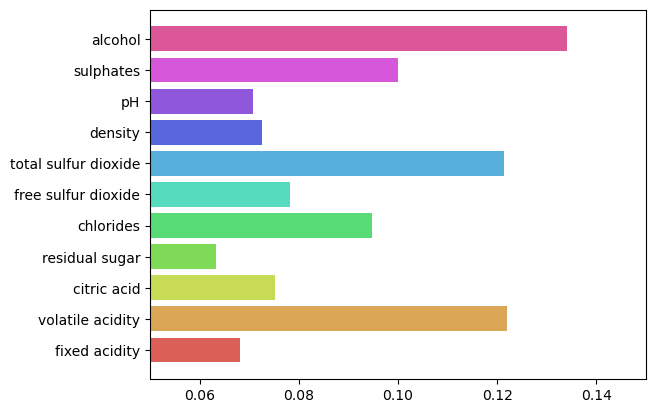

In [13]:
x = df.feature
y = df.importance
colors = sns.color_palette('hls',11)
plt.xlim(0.05,0.15)
plt.barh(x, y,color=colors)